## Simple Linear Regression

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
df=pd.read_csv('./resources/height-weight.csv')

In [4]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

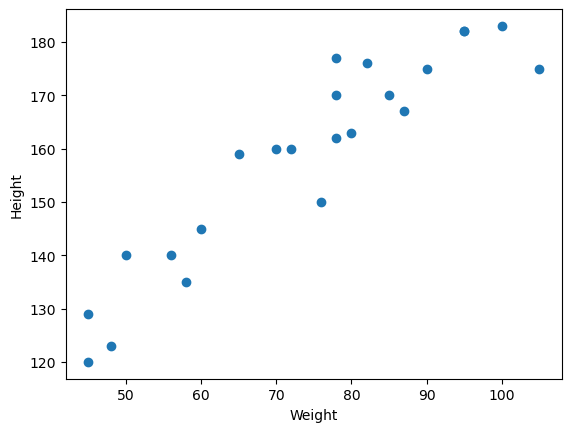

In [5]:
## Scatter plot
plt.scatter(df['Weight'], df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [6]:
## Correlation

df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


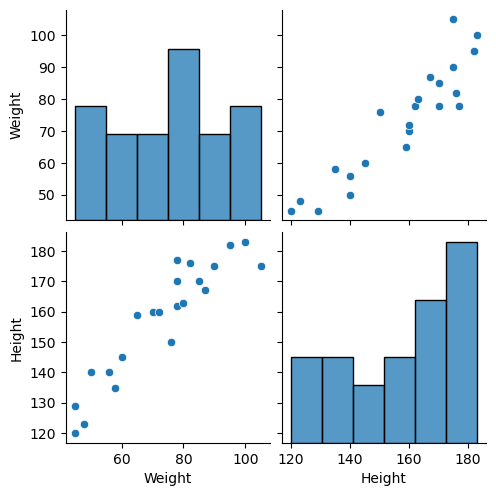

In [7]:
## Seaborne for visualization
import seaborn as sns
sns.pairplot(df)

In [8]:
## Independent and Dependent feature
X=df[['Weight']] ## Independent feature should be of 2d form
type(X)

pandas.core.frame.DataFrame

In [9]:
np.array(X).shape

(23, 1)

In [10]:
X.head()

,Weight
0,45
1,58
2,48
3,60
4,70


In [11]:
Y=df['Height']##Dependent feature can be in series form or 1D array

In [ ]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,Y, test_size=0.25, random_state=42)

In [15]:
X_train.shape

(17, 1)

In [16]:
## Standardization
from sklearn.preprocessing import StandardScaler

In [18]:
scalar=StandardScaler()
X_train=scalar.fit_transform(X_train)

In [19]:
X_test=scalar.transform(X_test)

In [20]:
X_test

array([[ 1.80496856],
       [ 0.15404184],
       [ 0.38175587],
       [-0.47217174],
       [ 0.26789886],
       [-1.43995636]])

In [22]:
## Apply Simple Linear Regress
from sklearn.linear_model import LinearRegression

In [26]:
regression=LinearRegression(n_jobs=-1)

In [27]:
regression.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [28]:
regression

LinearRegression(n_jobs=-1)

In [31]:
print("Coefficient or slope:", regression.coef_)
print("Intercept:", regression.intercept_)

Coefficient or slope: [18.96723918]
Intercept: 159.0


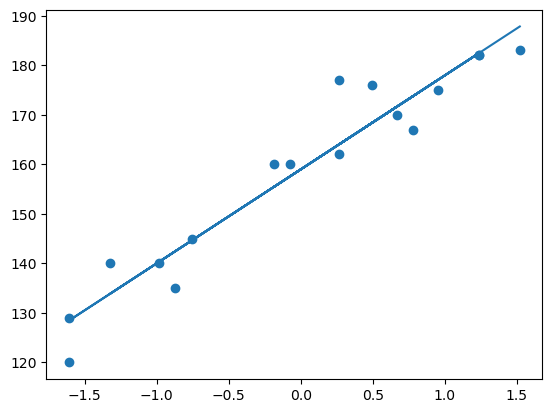

In [33]:
## Plot Training data plot best fit line
plt.scatter(X_train, y_train)
plt.plot(X_train, regression.predict(X_train))

predicted height output=intercept+coef_(weights)
y_pred_test=159+18.96(X_test)

In [36]:
## Prediction of test data
y_pred=regression.predict(X_test)

In [37]:
## Performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [39]:
mse=mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test, y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

112.6458256979502
9.4933949357436
10.613473780904638


R Square

R^2=1-SSR/SST

R^2=coefficient of determination SSR=sum of squares of residuals SST=total sum of squares

In [40]:
from sklearn.metrics import r2_score

In [42]:
score=r2_score(y_test, y_pred)
print(score)

0.6109699035757667


Adjusted R2= 1 -[(1-R2)*(n-1)/(n-k-1)]

where: 
R2: The R2 of the model

n: The number of observations

k: The number of predictor variables

In [43]:
# display adjusted R-Squared
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.5137123794697085

In [44]:
## OLS Linear Regression
import statsmodels.api as sm

In [47]:
model=sm.OLS(y_train, X_train).fit()

In [48]:
predicition=model.predict(X_test)
print(predicition)

[ 34.23527037   2.92174849   7.24085496  -8.95579429   5.08130172
 -27.31199677]


In [49]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.014
Model:                            OLS   Adj. R-squared (uncentered):             -0.048
Method:                 Least Squares   F-statistic:                             0.2274
Date:                Thu, 15 Jan 2026   Prob (F-statistic):                       0.640
Time:                        15:08:01   Log-Likelihood:                         -110.30
No. Observations:                  17   AIC:                                      222.6
Df Residuals:                      16   BIC:                                      223.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\Users\kavy1\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [51]:
## Prediction for new data
regression.predict(scalar.transform([[72]]))

c:\Users\kavy1\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([157.60264203])